In [ ]:
# Important links

# https://github.com/crowdAI/coco/tree/master/PythonAPI/pycocotools
# https://github.com/crowdAI/mapping-challenge-starter-kit/blob/master/Dataset%20Utils.ipynb
# https://arxiv.org/pdf/1703.06870.pdf


# for simle unet architecture : https://towardsdatascience.com/u-net-b229b32b4a71


## 10th Jan

# https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/
# https://github.com/GunhoChoi/Kind-PyTorch-Tutorial/blob/master/12_Semantic_Segmentation/UNet.py
# https://tuatini.me/practical-image-segmentation-with-unet/
# https://github.com/EKami/carvana-challenge/blob/original_unet/src/main.py

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# change the working dirctory
project_dir = "/home/webwerks/patricia/my-projects/github/Segmentation"
os.chdir(project_dir)

data_directory = "data/"
annotation_file_template = "{}/{}/annotation{}.json"

TRAIN_IMAGES_DIRECTORY = "data/train/images"
TRAIN_ANNOTATIONS_PATH = "data/train/annotation.json"
TRAIN_ANNOTATIONS_SMALL_PATH = "data/train/annotation-small.json"

VAL_IMAGES_DIRECTORY = "data/val/images"
VAL_ANNOTATIONS_PATH = "data/val/annotation.json"
VAL_ANNOTATIONS_SMALL_PATH = "data/val/annotation-small.json"

In [3]:
train_coco = COCO(os.path.join(TRAIN_ANNOTATIONS_PATH ))

loading annotations into memory...
Done (t=30.12s)
creating index...
index created!


In [4]:
dir(train_coco)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annToMask',
 'annToRLE',
 'anns',
 'catToImgs',
 'cats',
 'createIndex',
 'dataset',
 'download',
 'getAnnIds',
 'getCatIds',
 'getImgIds',
 'imgToAnns',
 'imgs',
 'info',
 'loadAnns',
 'loadCats',
 'loadImgs',
 'loadNumpyAnnotations',
 'loadRes',
 'showAnns']

In [6]:
category_ids = train_coco.loadCats(train_coco.getCatIds())
print(category_ids)

[{'id': 100, 'name': 'building', 'supercategory': 'building'}]


In [8]:
# This generates a list of all `image_ids` available in the dataset
image_ids = train_coco.getImgIds(catIds=train_coco.getCatIds())

In [9]:
len(image_ids)

280741

In [10]:
random_image_id = random.choice(image_ids)

In [12]:
# Now that we have an image_id, we can load its corresponding object by doing :
img = train_coco.loadImgs(random_image_id)[0] # loads meta data

In [15]:
type(img), img

(dict,
 {'id': 79696, 'file_name': '000000079696.jpg', 'width': 300, 'height': 300})

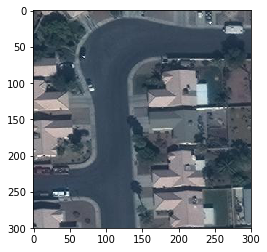

In [17]:

image_path = os.path.join(TRAIN_IMAGES_DIRECTORY, img["file_name"])
I = io.imread(image_path)
plt.imshow(I)

In [19]:
annotation_ids = train_coco.getAnnIds(imgIds=img['id'])
annotations = train_coco.loadAnns(annotation_ids)

In [20]:
annotation_ids

[679565,
 679562,
 679570,
 679559,
 679569,
 679560,
 679558,
 679563,
 679564,
 679566,
 679567,
 679561,
 679568]

In [22]:
len(annotations)

13

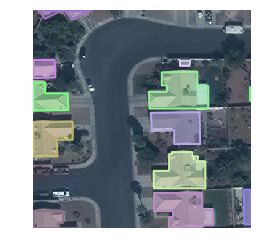

In [24]:
# load and render the image
plt.imshow(I); plt.axis('off')
# Render annotations on top of the image
train_coco.showAnns(annotations)

In [25]:
ann_segmentation = annotations[0]['segmentation']

from pycocotools import mask as cocomask
rle = cocomask.frPyObjects(ann_segmentation, img['height'], img['width'])
print(rle)

[{'size': [300, 300], 'counts': b'Tf^1;Q9<D0000000000000000000000000000000UOK_H5a7K_H5a7K_H5a7K_H5a7K_H5a7K_H5a7K_H5a7k000000000000000000000000000000000O1000000000000000000000000000000000000000000000000d0\\O0000000000000000000000000000lUa0'}]


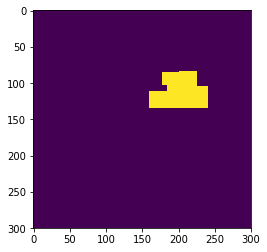

In [26]:
from pycocotools import mask as cocomask
rle = cocomask.frPyObjects(annotations[0]['segmentation'], img['height'], img['width'])
m = cocomask.decode(rle)
# m.shape has a shape of (300, 300, 1)
# so we first convert it to a shape of (300, 300)
m = m.reshape((img['height'], img['width']))
plt.imshow(m)

In [ ]:
def get_mask(self, img_index):
    annotation_ids = self.train_coco.getAnnIds(imgIds=[img_index])
    annotations = self.train_coco.loadAnns(annotation_ids)
    mask = self.train_coco.annToMask(annotations[0])
    for i in range(len(annotations)):
        mask = mask | self.train_coco.annToMask(annotations[i])
    return mask
    

In [42]:
# pylab.rcParams['figure.figsize'] = (10, 40.0)
# _rle_masks = []
# _ann = []
# for _idx, annotation in enumerate(annotations):
#     rle = cocomask.frPyObjects(annotation['segmentation'], img['height'], img['width'])
#     _rle_masks.append(rle)
# #     _ann.append(annotation['segmentation'])
# # #     plt.subplot(len(annotations), 1, _idx+1)



# # rle = cocomask.frPyObjects(annotation['segmentation'], img['height'], img['width'])
# # m = cocomask.encode(rle)
# #     # m.shape has a shape of (300, 300, 1)
# #     # so we first convert it to a shape of (300, 300)
# # _rle_masks.append(m)
    
# # img_obj = cocomask.merge(_rle_masks)
# # #     m = m.reshape((img['height'], img['width']))
# # #     plt.imshow(m)

In [43]:
# rle = cocomask.frPyObjects(_rle_masks, img['height'], img['width'])

TypeError: float() argument must be a string or a number, not 'dict'

In [66]:
# mask = train_coco.annToMask(annotations[0])
# plt.imshow(mask) ;
# # for i in range(len(annotations)):
# #     mask = mask + train_coco.annToMask(annotations[i])
# #     plt.imshow(mask) ;

In [65]:
# mask = mask + train_coco.annToMask(annotations[1])
# plt.imshow(mask) 

In [64]:
# mask = mask + train_coco.annToMask(annotations[2])
# plt.imshow(mask)

In [63]:
# mask = mask + train_coco.annToMask(annotations[3])
# plt.imshow(mask)

In [62]:
# mask = mask + train_coco.annToMask(annotations[12])
# plt.imshow(mask)

In [ ]:
def createImageForMask(file_path):
  file_name = str(file_path).split("/")[-1]
  out_data= imgDF[imgDF['file_name']==file_name]
  index= int(out_data['id'])
  sampleImgIds = coco.getImgIds(imgIds = [index])
  sampleImgDict = coco.loadImgs(index)[0]
  annIds = coco.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds, iscrowd=None)
  anns = coco.loadAnns(annIds)
  mask = coco.annToMask(anns[0])
  for i in range(len(anns)):
      mask = mask | coco.annToMask(anns[i])
  img=Image(pil2tensor(mask, dtype=np.float32))
  img.save(MASK_PATH/file_name)
  return MASK_PATH/file_name